In [1]:
from __future__ import division
import sys

import numpy as np
import numpy.random as rd

import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib import animation as ani
from matplotlib import gridspec

#from IPython.display import HTML 

sns.set(style="darkgrid", palette="muted", color_codes=True) 


### 対象の確率分布
ガンマ分布 ($\theta$を変数とする)

$$  f(\theta|\alpha, \lambda) = {\lambda^{\alpha} \over \Gamma(\alpha)} \theta^{\alpha-1}e^{-\lambda \theta}
\quad \quad 0 \le x,\quad 0 < \lambda,\quad 0 < \alpha $$


ハミルトニアン  
$$ H(\theta) = -\log (f(\theta|x)) + {1 \over 2} p^2 $$

ガンマ分布の場合  
尤度: $$ f(\theta|x) \propto e^{-\lambda \theta} \theta ^{\alpha -1} $$
  
$$ h(\theta) = \log (f(\theta|x)) = \lambda \theta - (\alpha -1) \log(\theta) $$
  
$$ { d h(\theta) \over d\theta} = \lambda - {\alpha -1 \over \theta} $$

In [78]:
# function definitions

def h(theta):
    global lam, alpha
    return lam * theta - (alpha-1)*np.log(theta) 

def dh_dtheta(theta):
    global lam, alpha
    return lam - (alpha - 1)/theta

def hamiltonian(p, theta):
    return h(theta) + 0.5*p**2

vhamiltonian = np.vectorize(hamiltonian)  # vectorize

def leapfrog_nexthalf_p(p, theta, eps=0.01):
    """
    1/2ステップ後のpを計算
    """
    return p - 0.5 * eps* dh_dtheta(theta)

def leapfrog_next_theta(p, theta, eps=0.01):
    """
    1ステップ後のθを計算
    """
    return theta + eps*p


def move_one_step(theta, p, eps=0.01, L=100, stlide=1):
    """
    リープフロッグ法でL回移動した１ステップを実行
    """
    ret = []
    ret.append([1, p, theta, hamiltonian(p,theta)])
    for _ in range(L):
        p = leapfrog_nexthalf_p(p, theta, eps)
        theta = leapfrog_next_theta(p, theta, eps)
        p = leapfrog_nexthalf_p(p, theta, eps)
        ret.append([1, p, theta, hamiltonian(p,theta)])
    return ret[::stlide]


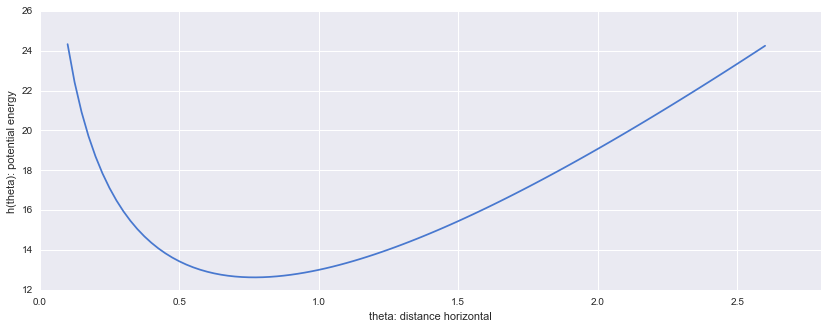

In [3]:
# graph parameter
_theta = np.linspace(0.1,2.6,101)
_dot = np.linspace(0.1,2.6,19)

# parameter
lam =13
alpha = 11

plt.figure(figsize=(14,5))
plt.xlim(0,2.8)
plt.plot(_theta, h(_theta))
#plt.scatter(_dot, h(_dot), c="r", s=30, zorder=100)
plt.xlabel("theta: distance horizontal")
plt.ylabel("h(theta): potential energy")
plt.show()

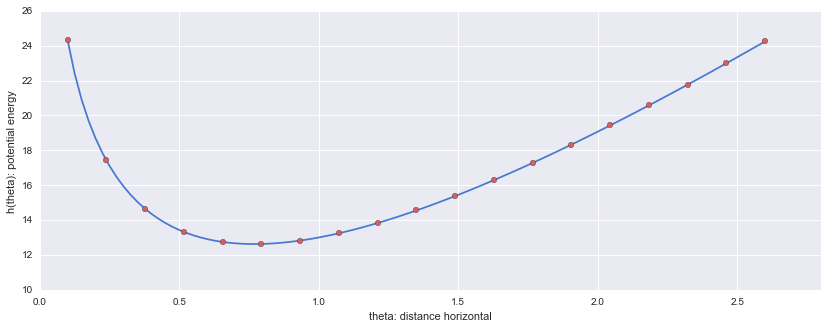

In [13]:
# graph parameter
_theta = np.linspace(0.1,2.6,101)
_dot = np.linspace(0.1,2.6,19)

# parameter
lam =13
alpha = 11

plt.figure(figsize=(14,5))
plt.xlim(0,2.8)
plt.plot(_theta, h(_theta))
plt.scatter(_dot, h(_dot), c="r", s=30, zorder=100)
plt.xlabel("theta: distance horizontal")
plt.ylabel("h(theta): potential energy")
plt.show()

In [118]:
# initial param
theta = 0.1
p = 0
eps = 0.01
L = 200
#T = 100

result = move_one_step(theta, p, eps=eps, L=L, stlide=1)

In [119]:
result = np.array(result)
#HTML(pd.DataFrame(result, columns="p,theta,hamiltonian".split(",")).to_html())
# type=1はリープフロッグ法による遷移を表す
pd.DataFrame(result, columns="type,p,theta,hamiltonian".split(","))



,type,p,theta,hamiltonian
0,1,0.000000,0.100000,24.325851
1,1,0.849157,0.104350,24.317130
2,1,1.625725,0.116983,24.299527
3,1,2.288462,0.136865,24.285407
4,1,2.831002,0.162752,24.278322
5,1,3.266636,0.193485,24.276330
6,1,3.614271,0.228085,24.276948
7,1,3.891620,0.265770,24.278604
8,1,4.113195,0.305917,24.280514
9,1,4.290302,0.348034,24.282342


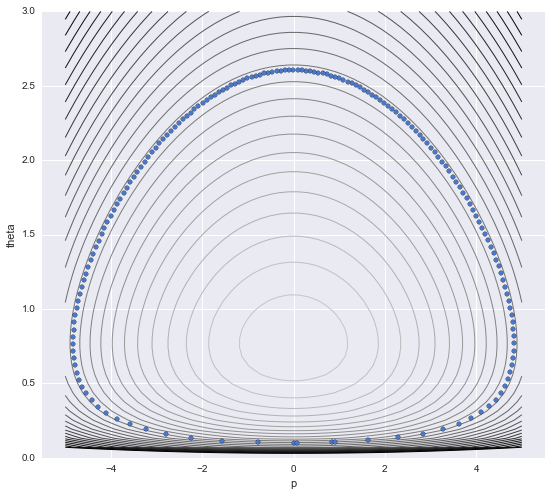

In [124]:
# オリジナルの向き
n = 170
plt.figure(figsize=(9,8))
plt.scatter(result[:n,1], result[:n,2], s=20, zorder=100)
plt.xlabel("p")
plt.ylabel("theta")
plt.ylim(0,3)

xx = np.linspace(-5,5)
yy = np.linspace(0.01, 3)
X, Y = np.meshgrid(xx, yy)
Z = hamiltonian(X, Y)

plt.contour(X, Y, Z, linewidths=1, cm=cm.rainbow, levels=np.linspace(0,40,40))

plt.show()

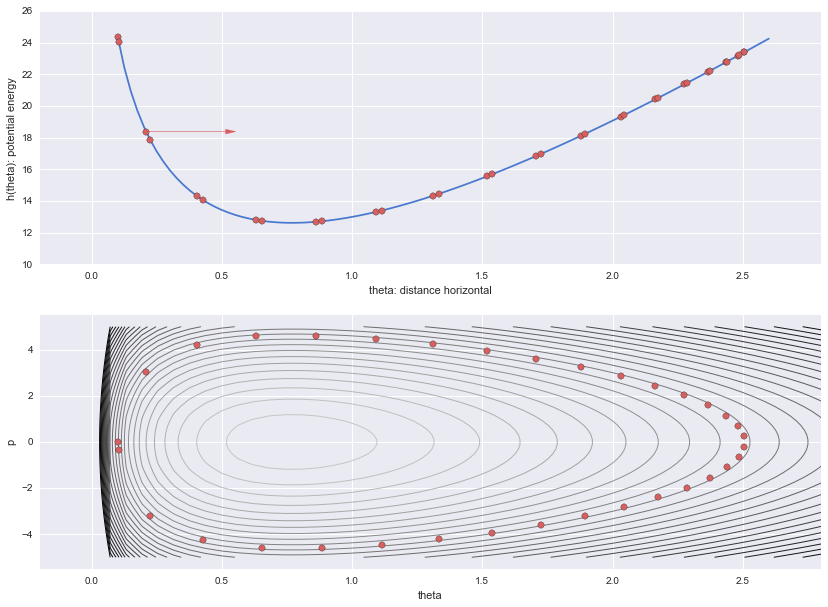

In [105]:
# 静止画
lam =13
alpha = 11
n = 34
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.xlim(-.2,2.8)
plt.plot(_theta, h(_theta))

plt.scatter(result[:n,2], h(result[:n,2]), c="r", s=40, zorder=100)
plt.arrow(result[1,2], h(result[1,2]), result[1,1]/10, 0, fc='r', ec='r', head_width=0.3, head_length=0.04,)

plt.xlabel("theta: distance horizontal")
plt.ylabel("h(theta): potential energy")

#===============================================
plt.subplot(2,1,2)
plt.scatter(result[:n,2], result[:n,1], c="r", s=40, zorder=100)
plt.ylabel("p")
plt.xlabel("theta")
plt.xlim(-.2,2.8)

yy = np.linspace(-5,5)
xx = np.linspace(0.01, 3)
X, Y = np.meshgrid(xx, yy)
Z = hamiltonian(Y, X)

plt.contour(X, Y, Z, linewidths=1, cm=cm.rainbow, levels=np.linspace(0,40,40))

plt.show()

0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 

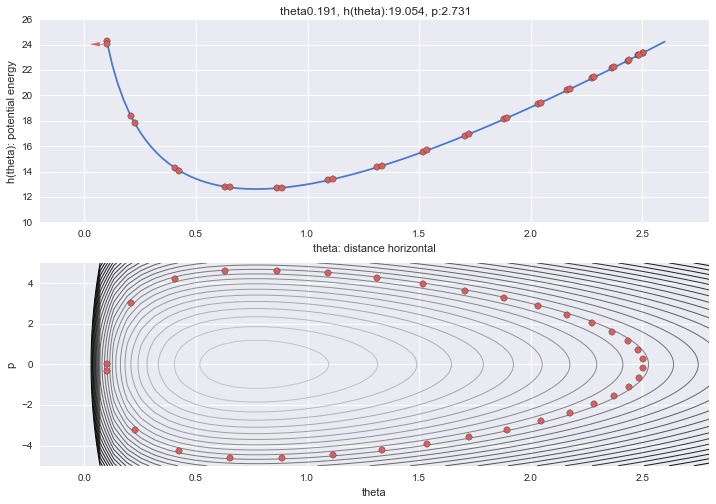

In [60]:

def animate(nframe):
    global num_frame, n
    #sys.stdout.write(str(int(float(nframe)/num_frame*100)) + "%, ") 
    sys.stdout.write("{}, ".format(nframe))
        
    plt.clf()
    
    lam =13
    alpha = 11
    
    plt.subplot(2,1,1)
    plt.ylim(10,26)
    plt.xlim(-.2,2.8)
    plt.plot(_theta, h(_theta))
    
    plt.plot()
    
    plt.title("theta{0:.3f}, h(theta):{1:.3f}, p:{2:.3f}".format(result[n,2], h(result[n,2]), result[n,1]))
    plt.arrow(result[n-1,2], h(result[n-1,2]), result[n-1,1]/10, 0, fc='r', ec='r', head_width=0.3, head_length=0.04)
    plt.scatter(result[:n,2], h(result[:n,2]), c="r", s=40, zorder=100)

    plt.xlabel("theta: distance horizontal")
    plt.ylabel("h(theta): potential energy")

    #===============================================
    plt.subplot(2,1,2)
    plt.ylabel("p")
    plt.xlabel("theta")
    plt.xlim(-.2,2.8)
    plt.ylim(-5,5)

    plt.scatter(result[:n,2], result[:n,1], c="r", s=40, zorder=100)
    
    yy = np.linspace(-5,5)
    xx = np.linspace(0.01, 3)
    X, Y = np.meshgrid(xx, yy)
    Z = vhamiltonian(Y, X)

    plt.contour(X, Y, Z, linewidths=1, cm=cm.rainbow, levels=np.linspace(0,40,40))
    #plt.tight_layout()
    n += 1

num_frame = 34
n = 0
fig = plt.figure(figsize=(12,8))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('phase_space.gif', writer='imagemagick', fps=4, dpi=90)


In [42]:
range(100)[::12]

[0, 12, 24, 36, 48, 60, 72, 84, 96]

In [22]:
rd.seed(123)
theta = 2.5
eps = 0.01
T = 15
scale_p = 1

step = []
prev_p = 0

for tau in range(T):
    p = rd.normal(loc=0,scale=scale_p)
    step.append([2, p, prev_p, 0])
    one_step = move_one_step(theta, p, eps=eps, L=96, stlide=12)
    theta = one_step[-1][2]
    step.extend(one_step)
    prev_p = one_step[-1][1]

    
len(step)

150

0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 

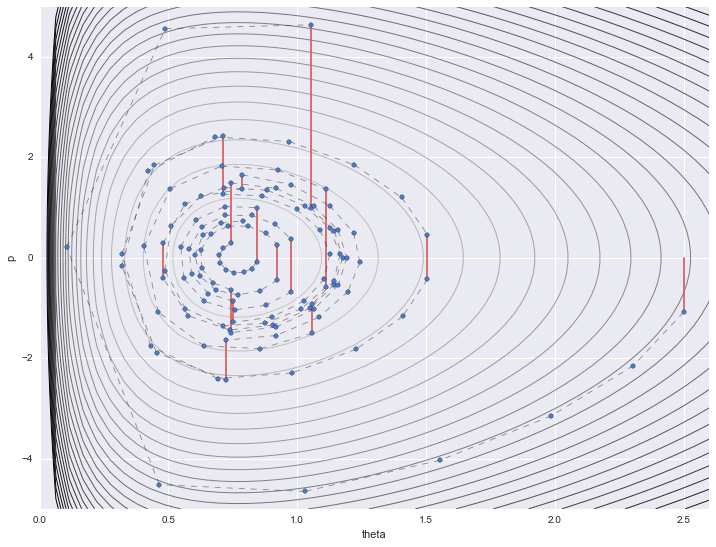

In [23]:
# 提案分布の説明部分
def animate(nframe):
    global num_frame, n
    sys.stdout.write("{}, ".format(nframe))
    
    if step[n][0] == 1:
        plt.scatter(step[n][2], step[n][1], s=20, zorder=100)
        if step[n-1][0] == 1:
            plt.plot([step[n-1][2], step[n][2]],[step[n-1][1], step[n][1]], c="k", ls="--", lw=.8, alpha=0.5)
        
    else:
        theta = step[n+1][2]
        
        plt.plot([theta, theta], [step[n][2], step[n][1]], c="r")
        
    n += 1
    
    
num_frame = len(step)-1
n = 0
scale_p = 1
fig = plt.figure(figsize=(12,9))

xx = np.linspace(0.01, 2.6)
yy = np.linspace(-5,5)
X, Y = np.meshgrid(xx, yy)
Z = vhamiltonian(Y, X)
plt.contour(X, Y, Z, linewidths=1, cm=cm.rainbow, levels=np.linspace(0,40,40))

plt.ylabel("p")
plt.xlabel("theta")
plt.xlim(0,2.6)
plt.ylim(-5,5)

anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('hmc_sampling_detail.gif', writer='imagemagick', fps=5, dpi=60)



In [80]:
_, p, theta, ham = move_one_step(theta, p, eps, L, stlide=1)[-1]
print p, theta, ham
hamiltonian(p,theta)

0.0793983847079 0.906714468256 12.7697170132


12.769717013162422

## HMC シミュレーション

In [150]:
# HMC simulation
rd.seed(71)
scale_p = 1

# initial param
theta = 2.5
p = rd.normal(loc=0,scale=scale_p)
eps = 0.01
L = 100
T = 10000
sim_result = []
prev_hamiltonian = hamiltonian(p,theta)
sim_result.append([ p, theta, prev_hamiltonian, True])
for t in range(T):
    prev_p = p
    prev_theta = theta
    prev_hamiltonian = hamiltonian(p,theta)
    for i in range(L):
        p = leapfrog_nexthalf_p(p, theta, eps=eps)
        theta = leapfrog_next_theta(p, theta, eps=eps)
        p = leapfrog_nexthalf_p(p, theta, eps=eps)

    H = hamiltonian(p,theta)
    r = np.exp(prev_hamiltonian-H)
    if  r > 1:
        sim_result.append([ p, theta, hamiltonian(p,theta), True])
    elif r > 0 and rd.uniform() < r:
        sim_result.append([ p, theta, hamiltonian(p,theta), True])
    else:
        sim_result.append([ p, theta, hamiltonian(p,theta), False])
        theta = prev_theta
    
    p = rd.normal(loc=0,scale=scale_p)
    
sim_result = np.array(sim_result)
df = pd.DataFrame(sim_result, columns="p,theta,hamiltonian,accept".split(","))
#df

In [151]:
print "accept ratio: ", np.sum([df.accept == 1])/len(df)

accept ratio:  0.999900009999


0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

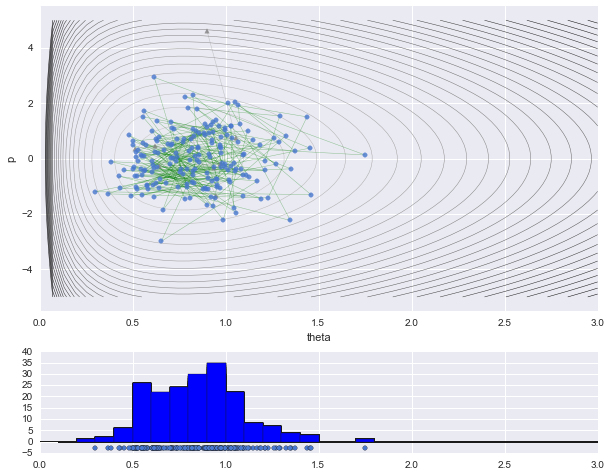

In [152]:

def animate(nframe):
    global num_frame, n
    sys.stdout.write("{}, ".format(nframe))
     
    #### 上段 #####
    if n < burn_in:
        marker = "^"
        color  = "gray"
        lc     = "gray"
    else:
        marker = "o"
        color  = "b"
        lc     = "green"

    if sim_result[i,3]  == 0:
        marker = "x"
        color  = "r"
        lc     = "gray"

    axs[0].scatter(sim_result[n,1], sim_result[n,0], s=20, marker=marker, 
                   zorder=100, alpha=0.8, color=color) #,

    if n > 1:
        axs[0].plot([sim_result[n-1,1], sim_result[n,1]],
                    [sim_result[n-1,0], sim_result[n,0]], c=lc, lw=0.5, alpha=0.4)

        
    #### 下段 #####
    axs[1].scatter(sim_result[n,1], -3, alpha=1, marker=marker, c=color)

    if n > burn_in:
        hist_data = pd.DataFrame(sim_result[burn_in:n], columns="p,theta,hamiltonian,accept".split(","))
        hist_data = hist_data[hist_data.accept ==1]
        hist_data.theta.hist(bins=np.linspace(0,3,31),ax=axs[1], color="blue",)
    ### ========================
    
    n += 1
    
burn_in = 10
num_frame = 200
n = 1
n_col = 1
n_row = 2

fig, _ = plt.subplots(n_row, n_col, sharex=False, figsize=(10,8)) 
gs = gridspec.GridSpec(n_row, n_col, height_ratios=[3,1])
axs = [plt.subplot(gs[i]) for i in range(n_row*n_col)]

xx = np.linspace(0.01, 3)
yy = np.linspace(-5,5)
X, Y = np.meshgrid(xx, yy)
Z = vhamiltonian(Y, X)
axs[0].contour(X, Y, Z, linewidths=0.5, cm=cm.rainbow, levels=np.linspace(0,40,40))
    
axs[0].set_ylabel("p")
axs[0].set_xlabel("theta")
axs[0].set_xlim(0,3)
axs[1].set_xlim(0,3)
axs[1].set_ylim(-5,40)
    
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('hmc_simulation2.gif', writer='imagemagick', fps=4, dpi=72)


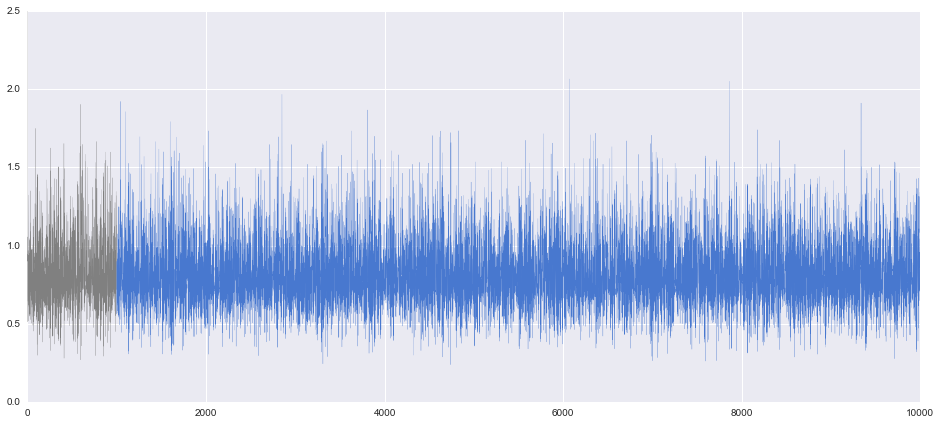

In [153]:
# Trace Plot
burn_in = int(T*0.1)
w = 0.05
n = len(sim_result[burn_in:,1])

plt.figure(figsize=(16,7))
plt.plot(range(burn_in), sim_result[:burn_in,1], lw=0.2, color="gray")
plt.plot(range(burn_in,len(sim_result)), sim_result[burn_in:,1], lw=0.2)

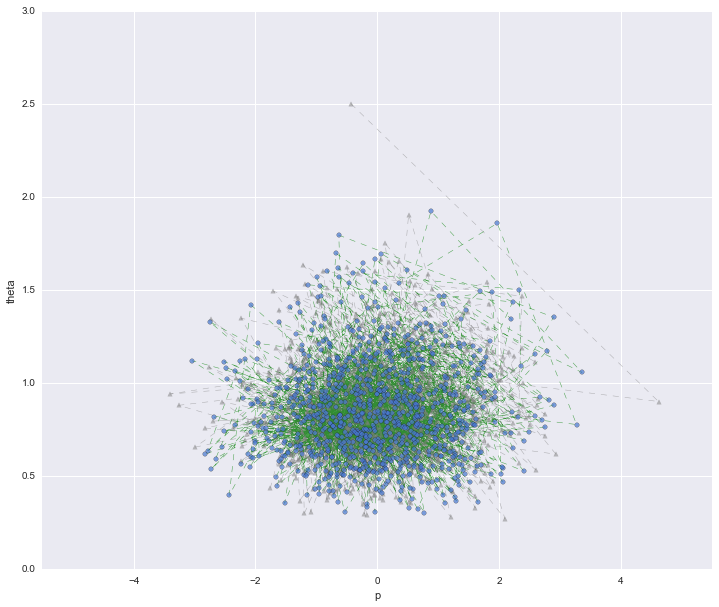

In [154]:
burn_in = int(T*0.1)
n_plot_max = 1000 + burn_in

plt.figure(figsize=(12,10))
plt.xlabel("p")
plt.ylabel("theta")
plt.ylim(0,3)


plt.scatter(sim_result[:burn_in,0], sim_result[:burn_in,1], color="gray", marker="^", 
            s=20, zorder=100, alpha=0.5)
plt.scatter(sim_result[burn_in:n_plot_max,0], sim_result[burn_in:n_plot_max,1], marker="o", 
            s=20, zorder=100, alpha=0.7)

plt.plot(sim_result[:burn_in,0], sim_result[:burn_in,1], c="gray" , ls="--", lw=0.5, alpha=0.6)
plt.plot(sim_result[burn_in:n_plot_max,0], sim_result[burn_in:n_plot_max,1], c="green", ls="--", lw=0.5, alpha=0.7)

xx = np.linspace(-5,5)
yy = np.linspace(0.01, 3)
X, Y = np.meshgrid(xx, yy)
Z = vhamiltonian(X, Y)

plt.contour(X, Y, Z, linewidths=1, cm=cm.rainbow, levels=np.linspace(-40,0,40))

plt.show()

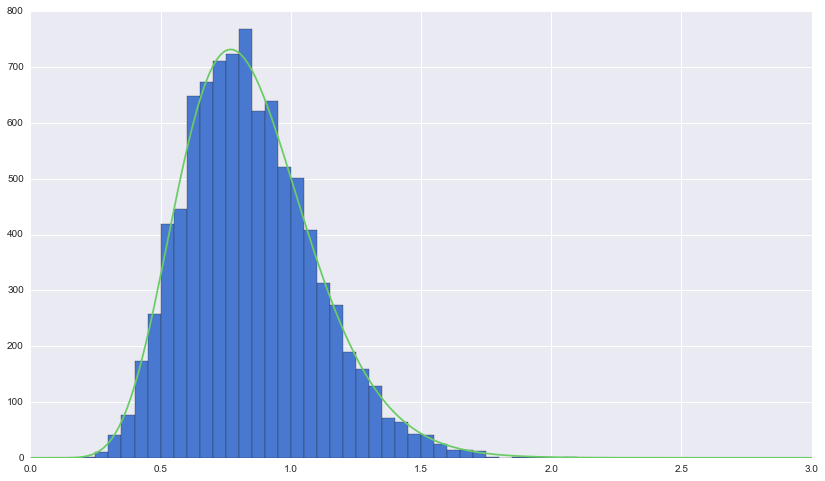

In [155]:
burn_in = T*0.1
w = 0.05
n = len(sim_result[burn_in:,1])

xx = np.linspace(0.01, 3, 200)
plt.figure(figsize=(14,8))
plt.hist(sim_result[burn_in:,1], bins=np.arange(0,3,w))
plt.plot(xx, st.gamma.pdf(xx, 11, 0, 1/13)*w*n)